In [1]:
from ipywidgets import interact
def f(x): 
    return x ** 2
interact(f, x=10); 

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

In [2]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from functools import reduce
from itertools import combinations

In [21]:
df_ = pd.read_csv("sample-data.csv", header=1)

def tofloat(dat: pd.DataFrame) -> pd.DataFrame: 
    return dat.assign(**{col: dat[col].map(eval) for col in dat.columns})

def mknewtondelta(dat: pd.DataFrame) -> pd.DataFrame: 
    """how far does newton take the initial guess to the final guess?"""
    return dat.assign(newton_delta=(dat.Root - dat.D).abs())

df = df_.pipe(tofloat).pipe(mknewtondelta)

In [22]:
def heatmaps(dat: pd.DataFrame, axis: str, ranseed: int = 1) -> alt.Chart: 
    """Returns a horizontal array of heatmaps, also drops outliers from dat[axis]"""
    assert axis in dat.columns, f"Given axis {axis} not in dat.columns"
    return reduce(
        lambda C,D: C | D,
        ((
            alt.Chart(dat[(np.abs(stats.zscore(dat[axis])) < 3)].sample(4999, random_state=ranseed))
            .mark_rect()
            .encode(
                x=alt.X(f"{x}:O", bin=alt.BinParams(maxbins=100)), 
                y=alt.Y(f"{y}:O", bin=alt.BinParams(maxbins=100)), 
                color=f"{axis}:Q"
            )
            .properties(width=500, height=500)
        ) 
        for x,y 
        in combinations((
            col for col in dat.columns if col != axis
        ), 2))
    )

In [23]:
heatmaps(df, "Y")

alt.HConcatChart(...)

In [24]:
heatmaps(df, "newton_delta")

alt.HConcatChart(...)

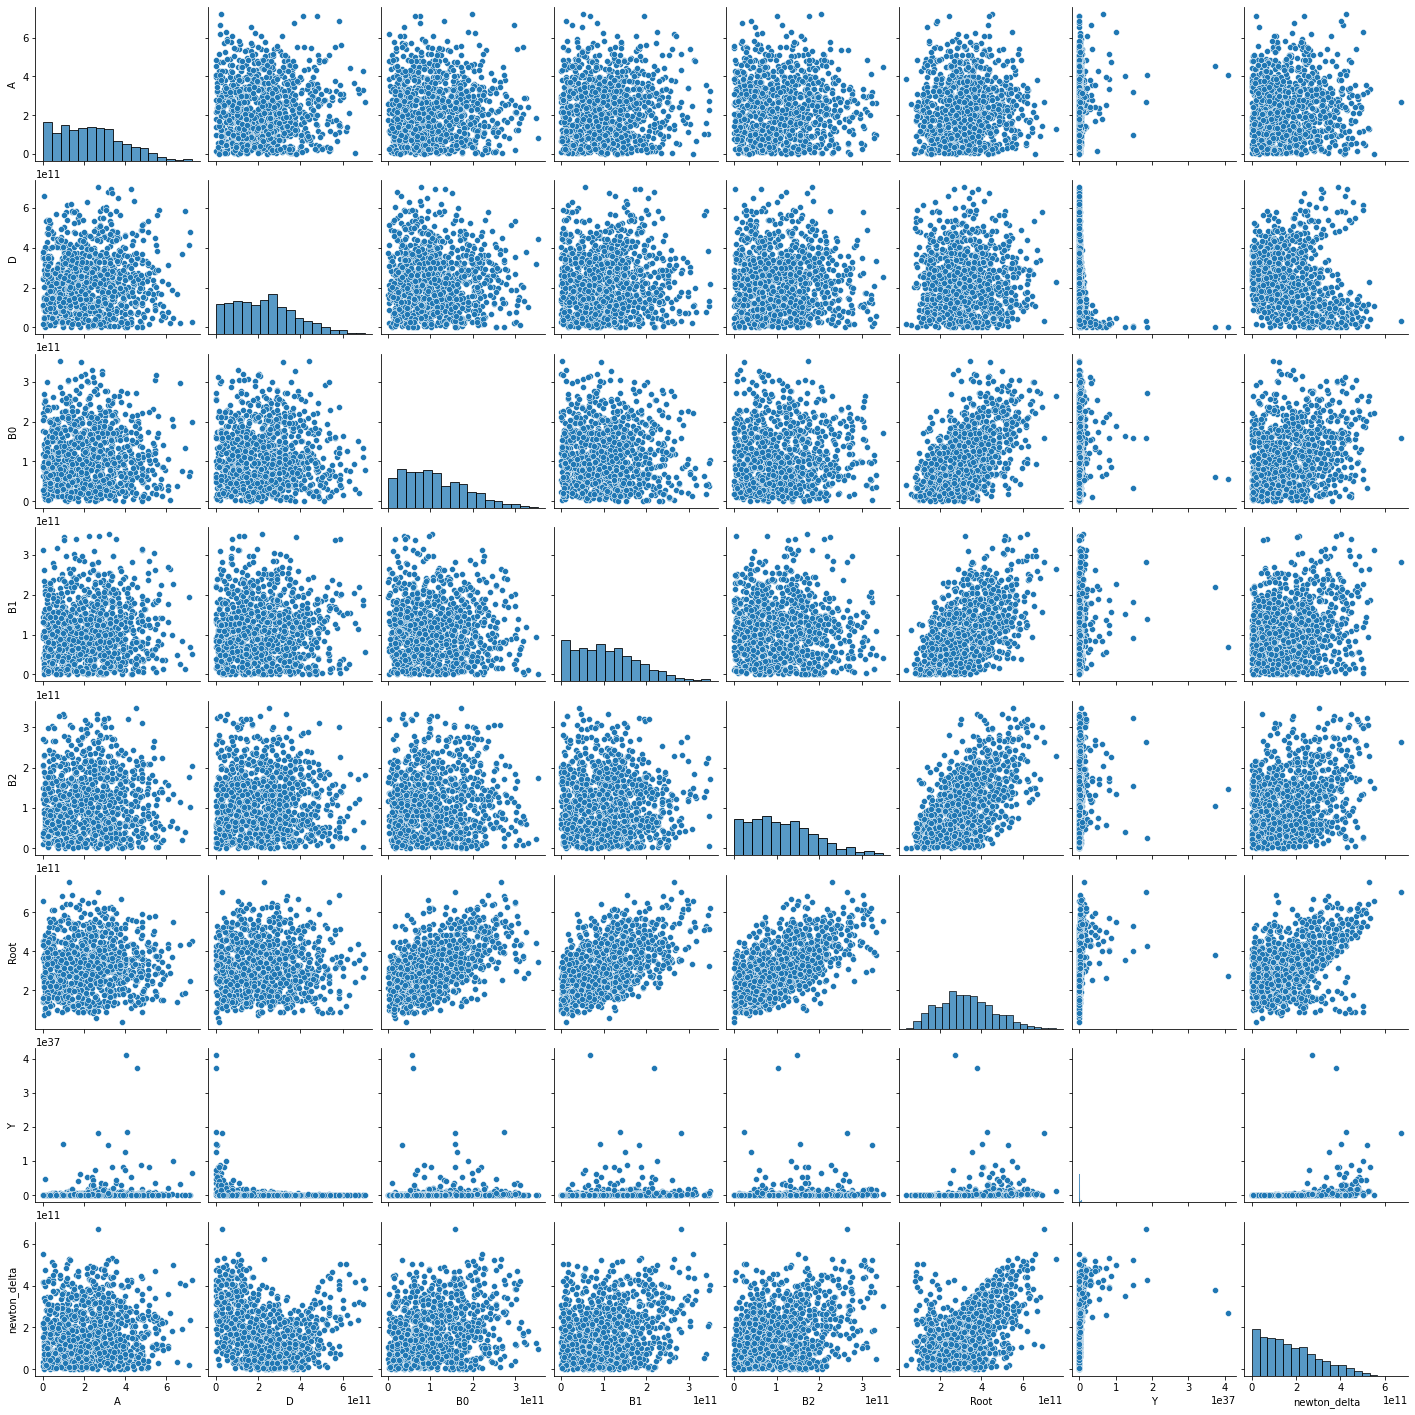

In [25]:
sns.pairplot(df.sample(frac=0.1));

In [26]:
df[df.Y.abs() < 1e37].mean()

A               2.290544e+00
D               2.326925e+11
B0              1.144192e+11
B1              1.135821e+11
B2              1.129300e+11
Root            3.297904e+11
Y               2.701694e+35
newton_delta    1.796124e+11
dtype: float64

In [27]:
df.mean()

A               2.298446e+00
D               2.305197e+11
B0              1.150069e+11
B1              1.142610e+11
B2              1.133798e+11
Root            3.316003e+11
Y               8.611959e+35
newton_delta    1.827781e+11
dtype: float64

In [28]:
df.Y.mean()

8.611959378396537e+35

In [34]:
len(str(eval(df_.Y[0])))

21